<a href="https://colab.research.google.com/github/smahesh2694/NEU_XAI/blob/master/MVTec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [0]:
import pandas as pd
import numpy as np
import os
import keras
import cv2
import matplotlib.pyplot as plt
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D, Dropout
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.optimizers import Adam, SGD
from skimage.segmentation import mark_boundaries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
# keras.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [0]:
# resnet = ResNet50(include_top=False, weights='imagenet')

In [0]:
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
# from keras.models import Sequential
# from keras import optimizers

# model = Sequential()
# model.add(restnet)
# model.add(Dense(512, activation='relu', input_dim=input_shape))
# model.add(Dropout(0.3))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=2e-5),
#               metrics=['accuracy'])
# model.summary()

In [52]:
img_height = 224
img_width = 224

base_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [53]:
num_classes = 30

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
#x=Dense(512,activation='relu')(x) 
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
base_model.trainable = False

In [0]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True, 
                                 validation_split=0.2)

In [0]:
bs = 16

In [57]:
train_generator=train_datagen.flow_from_directory('train',  
                                                 target_size=(224,224),     
                                                 batch_size=bs,
                                                 class_mode='categorical',                                                 
                                                 shuffle=True,
                                                 subset='training')

Found 2884 images belonging to 30 classes.


In [58]:
label_map = (train_generator.class_indices)
print(label_map)
print(len(label_map))

{'defective_bottle': 0, 'defective_cable': 1, 'defective_capsule': 2, 'defective_carpet': 3, 'defective_grid': 4, 'defective_hazelnut': 5, 'defective_leather': 6, 'defective_metalnut': 7, 'defective_pill': 8, 'defective_screw': 9, 'defective_tile': 10, 'defective_toothbrush': 11, 'defective_transistor': 12, 'defective_wood': 13, 'defective_zipper': 14, 'good_bottle': 15, 'good_cable': 16, 'good_capsule': 17, 'good_carpet': 18, 'good_grid': 19, 'good_hazelnut': 20, 'good_leather': 21, 'good_metalnut': 22, 'good_pill': 23, 'good_screw': 24, 'good_tile': 25, 'good_toothbrush': 26, 'good_transistor': 27, 'good_wood': 28, 'good_zipper': 29}
30


In [59]:
val_generator=train_datagen.flow_from_directory('train', 
                                                 target_size=(224,224),  
                                                 batch_size=bs,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='validation')

Found 704 images belonging to 30 classes.


In [0]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['acc'])

In [61]:
step_size_train=train_generator.n//train_generator.batch_size
print(step_size_train)
step_size_val=val_generator.n//val_generator.batch_size
print(step_size_val)

180
44


In [0]:
initial_epochs = 25

In [63]:
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data=val_generator,
                   validation_steps=step_size_val,                
                   epochs=initial_epochs)

Epoch 1/25
180/180 [==============================] - 199s 1s/step - loss: 1.1640 - acc: 0.6754 - val_loss: 0.6784 - val_acc: 0.8054
Epoch 2/25
180/180 [==============================] - 184s 1s/step - loss: 0.6051 - acc: 0.7972 - val_loss: 0.6089 - val_acc: 0.8324
Epoch 3/25
180/180 [==============================] - 185s 1s/step - loss: 0.4750 - acc: 0.8309 - val_loss: 0.6647 - val_acc: 0.8281
Epoch 4/25
180/180 [==============================] - 182s 1s/step - loss: 0.4335 - acc: 0.8500 - val_loss: 0.3961 - val_acc: 0.8651
Epoch 5/25
180/180 [==============================] - 183s 1s/step - loss: 0.3786 - acc: 0.8601 - val_loss: 0.5530 - val_acc: 0.8537
Epoch 6/25
180/180 [==============================] - 182s 1s/step - loss: 0.3081 - acc: 0.8924 - val_loss: 0.3800 - val_acc: 0.8750
Epoch 7/25
180/180 [==============================] - 181s 1s/step - loss: 0.2615 - acc: 0.9087 - val_loss: 0.4791 - val_acc: 0.8750
Epoch 8/25
180/180 [==============================] - 180s 1s/step - 

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

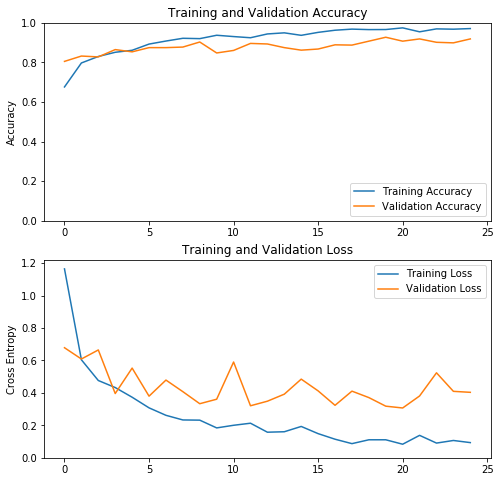

In [65]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
# plt.savefig('/content/drive/My Drive/xai_model/MVTec_epoch25.jpg')
plt.show()

In [66]:
# # memory footprint support libraries/code
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize
# import psutil
# import humanize
# import os
# import GPUtil as GPU
# GPUs = GPU.getGPUs()
# # XXX: only one GPU on Colab and isn’t guaranteed
# gpu = GPUs[0]
# def printm():
#  process = psutil.Process(os.getpid())
#  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
#  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
# printm() 

Gen RAM Free: 10.3 GB  | Proc size: 3.2 GB
GPU RAM Free: 7537MB | Used: 8743MB | Util  54% | Total 16280MB


In [0]:
# !kill -9 -1

In [0]:
# model.save('/content/drive/My Drive/xai_model/MVTec_25.h5')

In [0]:
# model.save_weights('/content/drive/My Drive/xai_model/MVTec_25_weights.h5')

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [73]:
test_generator = test_datagen.flow_from_directory('test',
                                                  target_size=(224,224),     
                                                  batch_size=bs,
                                                  class_mode='categorical',
                                                  shuffle = False)

Found 1542 images belonging to 30 classes.


In [0]:
predIndxs = model.predict_generator(test_generator,steps = (test_generator.n//test_generator.batch_size)+1 )

In [0]:
predIndxs = np.argmax(predIndxs, axis=1)

In [76]:
print(classification_report(test_generator.classes, predIndxs, target_names=test_generator.class_indices.keys()))

                      precision    recall  f1-score   support

    defective_bottle       1.00      0.89      0.94        19
     defective_cable       1.00      0.61      0.76        28
   defective_capsule       0.96      0.82      0.89        33
    defective_carpet       1.00      0.74      0.85        27
      defective_grid       1.00      0.79      0.88        14
  defective_hazelnut       0.95      1.00      0.98        21
   defective_leather       1.00      1.00      1.00        28
  defective_metalnut       1.00      0.36      0.53        28
      defective_pill       1.00      0.50      0.67        42
     defective_screw       1.00      0.35      0.52        17
      defective_tile       1.00      0.80      0.89        25
defective_toothbrush       1.00      0.67      0.80         9
defective_transistor       0.60      0.75      0.67        12
      defective_wood       1.00      0.89      0.94        18
    defective_zipper       1.00      0.94      0.97        36
       

In [0]:
cm = confusion_matrix(test_generator.classes,predIndxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1] + cm[2, 2] + cm[3, 3] + cm[4, 4] + cm[5, 5]) / total
#sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) sensitivity of each class 
#specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

In [78]:
print(cm)
print("Accuracy: {:.4f}".format(acc))
#print("Sensitivity: {:.4f}".format(sensitivity))
#print("Specificity: {:.4f}".format(specificity))

[[ 17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0  11   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  27   0   0   0   0   0   0   0   0   0   0   0   0   0   0   6
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  20   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    7   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  11   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  21   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  28   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  18   0   0   0   0   0   0   0]


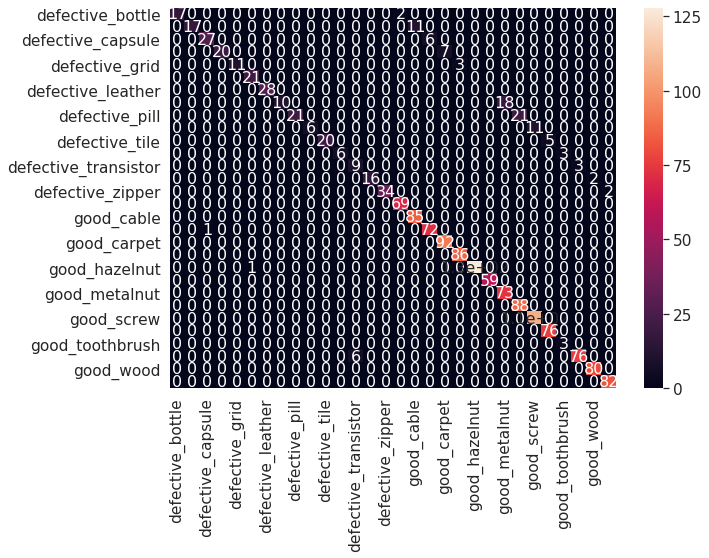

In [79]:
import seaborn as sn
import pandas as pd
    
plt_cm = pd.DataFrame(cm, index=test_generator.class_indices.keys(), columns=test_generator.class_indices.keys())
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(plt_cm, annot=True,annot_kws={"size": 16})
plt.savefig('/content/drive/My Drive/xai_model/MVTec_25_CM.jpg')